# Skin Segmentation Logistic Regression

### Project Goal

To experiment with a real-world application of logistic regression to further my understanding of machine learning.

### Question Answered by Model

What is the (*log odds of*) probability that a pixel containing R, G, B values represents the skin of human face?

### Why (Binary) Logistic Regression?

Binary classification problems are perfect for logistic regression because logistic regression allows us to predict the probability of a discrete outcome (here, a pixel containing skin or no skin) based on a set of independent features (here, R, G, and B values) related to that outcome.

**Why not linear regression?** While the underlying mechanism in logistic regression is linear regression (because the log odds probability of the outcome is a linear function of the features), linear regression is best used when trying to model the linear relationship between various (discrete or continuous) features with a *continuous* outcome. Moreover, linear regression models aim to minimize the sum of squared errors, while logistic regression models aim to model the parameters under which our observations become most likely.

**Why not a Decision Tree?** Great question! This dataset would work great with a decision tree. To put it simply, the goal of this project was for me to explore a real-world application of logistic regression. In the future, I would love to optimize my model by employing the ID3 & CART algorithms.

### Dataset

The dataset used in this project is called Skin Segmentation, which can be access [here](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation).

The data in Skin Segmentation were collected "by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database." It has 245,057 rows and 4 columns (B, G, R, and a binary column indicating whether the pixel was classified as containing skin or not containing skin).

The dataset has been cited in two scholarly articles, both of which are viewable (although pay-walled) via the link above, and was made available to the public in 2012 by Rajen Bhatt and Abhinav Dhall.

### Future Possibilities

In addition to optimizing my model by testing out the ID3 and CART decision tree algorithms, I would love to do some hyperparameter tuning after testing my model out with a various pictures of my friends.

## LOADING & CLEANING THE DATA

In [192]:
# Importing the Pandas library w/the alias "pd" for easier coding.
# Setting the URL variable equal to the URL at which my dataset is located.
# Reading the dataset into a variable called df with the use of Pandas, thereby creating a dataframe ("df") out of it.
# Inspecting the first five rows of df.

import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'

df = pd.read_csv(url, sep = '\s+', header=None) # using whitespace as my separator

df.head()

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [193]:
# Renaming column headers for clarity

df = df.rename(columns = {0:'B', 1: 'G', 2: 'R', 3: 'Skin or No-Skin'})
df.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [213]:
# We can see that our target variable is binary, but that it's made of 1s and 2s.
# The best practice is to have our binary variable be represented as 0s and 1s. 
# So, let's change our Skin or No-Skin variable to 0s and 1s.

df['Skin or No-Skin'][df['Skin or No-Skin']==1]=0
df['Skin or No-Skin'][df['Skin or No-Skin']==2]=1

# Viewing column to make sure above code worked
df['Skin or No-Skin']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
245027    1
245028    1
245029    1
245030    1
245031    1
245032    1
245033    1
245034    1
245035    1
245036    1
245037    1
245038    1
245039    1
245040    1
245041    1
245042    1
245043    1
245044    1
245045    1
245046    1
245047    1
245048    1
245049    1
245050    1
245051    1
245052    1
245053    1
245054    1
245055    1
245056    1
Name: Skin or No-Skin, Length: 245057, dtype: int64

## EXPLORING THE DATA

In [214]:
# Inspecting the values and percentages of my classes

print(df['Skin or No-Skin'].value_counts())
print(df['Skin or No-Skin'].value_counts(normalize=True))

1    194198
0     50859
Name: Skin or No-Skin, dtype: int64
1    0.792461
0    0.207539
Name: Skin or No-Skin, dtype: float64


#### Interpretation
From the value_counts() readout above, you can see that the outcome variable is binary and is represented in 1s and 2s.

From our dataset's description ([here](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation)), we know that the skin samples total 50,859 in number, while the no-skin samples total 194,198. So, here **0s are skin-pixels and 1s are no-skin pixels.**

We can see in the normalized readout (the 2nd one, showing the percentages of the total that each label makes up) that our dataset is a bit imbalanced: about 79% of our pixels are classified as no-skin while about 21% of our pixels are classified as skin. 

While we could try to balance our dataset using a technique like SMOTE (For more on SMOTE, I recommend checking out Nick Becker states in his blog post "[The Right Way to Oversample](https://beckernick.github.io/oversampling-modeling/)), in data-science circles this type of imbalance is perfectly acceptable; if we had a split along the lines of 99% v 1%, then we might consider taking the time to balance our data

## PREPARING THE DATA

In [215]:
# assigning our target variable to "y"

y = df['Skin or No-Skin']

In [216]:
# creating a dataframe (matrix) for our x-variables, making sure to drop null values

X = df.iloc[:,:-1].dropna()
X.head()

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b9ee6a0>,
      dtype=object)

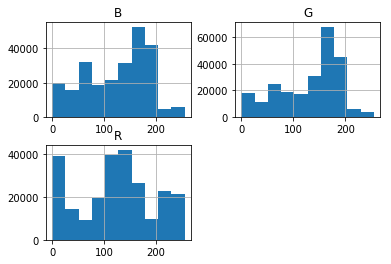

In [217]:
# Inspecting the distributions of our independent variables (x-variables, or "features")
# (Since we're doing logistic regression, we don't need to normalize or scale our features, but it's nice to explore their distributions)

X.hist()

#### Interpretation

You can see above that our features are relatively normally distributed. While we don't **need** our features to be normally distributed to run logistic regression, it does make our data nicer to work with and is good to keep in mind when interpreting our results.

### Train, Test, Split

When running machine learning algorithms, you want to need to split your data into a training set and a test set so that you can evaluate your model's performance on previously-unseen data. 

Here I use Scikit Learn's train_test_split function to get an 80/20 split between our train/test data for our X and y values.

In [218]:
# Split my data into test and train datasets
# Test size of 20% ensures I get an 80/20 split
# Random state can be set to any number, but setting it to zero is easy for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


## MODELING THE DATA & EVALUATING THE MODEL

Here, I am instantiating a Logistic Regression object (without an intercept just to keep things easy, and a C parameter of something super, super small in order to reduce overfitting) called logreg (see [here](https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul) for more info on C-parameters)

In [219]:
# Instantiating logreg object
logreg = LogisticRegression(fit_intercept = False, C = 1e12)

# Fitting model to my training data
model_log = logreg.fit(X_train, y_train)

# Using my model to make predictions re: the labels of the outcome using my test features (that my model hasn't seen before)
y_hat_test = logreg.predict(X_test)

# Evaluating metrics of my model
from sklearn.metrics import *

print ('\nTEST RESULTS')
print (f'Accuracy Score: {round(model_log.score(X_test, y_test),2)}')
print (f'Recall: {round(recall_score(y_test, y_hat_test),2)}')
print (f'F-1 Score: {round(f1_score(y_test, y_hat_test),2)}')
print (f'Precision: {round(precision_score(y_test, y_hat_test),2)}')


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



TEST RESULTS
Accuracy Score: 0.91
Recall: 0.92
F-1 Score: 0.94
Precision: 0.96


In [220]:
# Alternative readout of above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     10147
           1       0.96      0.92      0.94     38865

   micro avg       0.91      0.91      0.91     49012
   macro avg       0.85      0.88      0.86     49012
weighted avg       0.91      0.91      0.91     49012



#### Test Results Interpretation

You can see above that my model's accuracy score (i.e. the correct predictions from all predictions made) is 91%. This means that my model will classify an before-unseen pixel as containing skin or no skin 91% of the time.

My model's recall, f-1 score, and precision are lower than its accuracy. In the future, it might be nice to do some feature engineering and/or hyperparameter tuning to improve these metrics.

As a reminder:
- Recall or *sensitivity* is the number of true positives divided by the number of true positives plus the number of false negatives. 
- Precision is number of true positives over the total number of predicted positives.
- An f-1 Score is essentially a single number that takes into account both precision and recall to give interpreters a quick idea of model performance (kind of like the balance between the two).

Depending on the task at hand, I might want to prioritize increasing my model's precision over its recall (or vice versa). If my model were to be used for determining whether there were people on the ground before a bomb strike, I would very likely want to prioritize precision – it would be better to be very, very sure there are no people and risk missing an inanimate object by a few feet than vice versa.

(You can also see from the "Classification Report" above that our metrics are higher on our no-skin pixels, but that our priority lies with identifying pixels containing people's faces.)

### Confusion Matrix & ROC-AUC Curve

[[ 8539  3018]
 [ 1608 35847]]


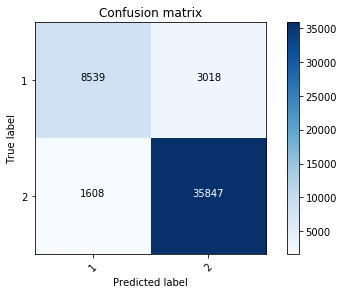

In [221]:
# For alternative ways to evaluate our model, I will also inspect a confusion matrix
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix,classes=[1,2])

#### Confusion Matrix Interpretation

As you can see from above, our model did have incorrect classifications a fair bit of the time (1,608 false positives (3%) and 3,018 false negatives (2%)), but nothing too alarming. What's most important is that the model classified skin-having pixels as skin and non-skin-having pixels as no-skin 91% of the time.

In [224]:
# Evaluating model using a ROC-AUC curve
from sklearn.metrics import roc_curve, auc

# creating ROC curve of our test data
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# fpr stands for false positive rate, and tpr stands for true positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC score is 0.9328273669481115


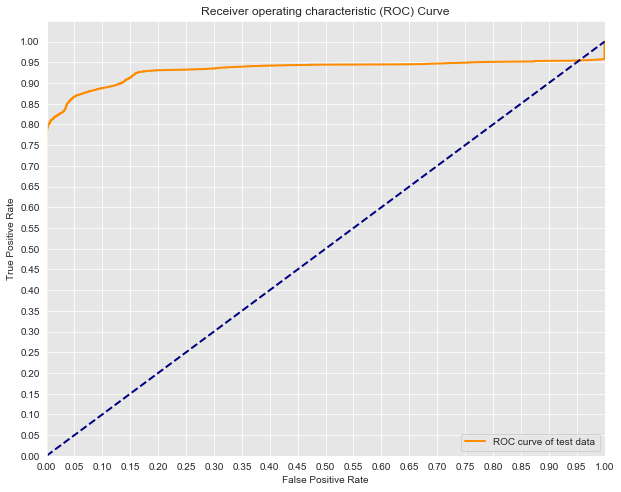

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC score is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Interpreting ROC-AUC Curve

## Evaluating Model Performance Using K-Fold Cross-Validation

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# instantiating my model
logreg = LogisticRegression(fit_intercept = False,C = 1e12)

# computing cv score (don't run train_test_split beforehand)
scores = cross_val_score(logreg, X, y, cv = 3)

# f-1 score
scores_f1 = cross_val_score(logreg, X, y, cv = 3, scoring='f1')

# r-squared
scores_r2 = cross_val_score(logreg, X, y, cv = 3, scoring='r2')

# precision
scores_precis = cross_val_score(logreg, X, y, cv = 3, scoring='precision')

# recall
scores_recall = cross_val_score(logreg, X, y, cv = 3, scoring='recall')

# negative MSE
scores_negMSE = cross_val_score(logreg, X, y, cv = 3, scoring='neg_mean_squared_error')


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

In [147]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [173]:
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print("F-1 Score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))

print("R-Squared: %0.2f (+/- %0.2f)" % (scores_r2.mean(), scores_r2.std() * 2))

print("Precision: %0.2f (+/- %0.2f)" % (scores_precis.mean(), scores_precis.std() * 2))

print("Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))

print("Negative MSE: %0.2f (+/- %0.2f)" % (scores_negMSE.mean(), scores_negMSE.std() * 2))


Accuracy: 0.90 (+/- 0.05)
F-1 Score: 0.77 (+/- 0.10)
R-Squared: 0.39 (+/- 0.33)
Precision: 0.74 (+/- 0.17)
Recall: 0.83 (+/- 0.09)
Negative MSE: -0.10 (+/- 0.05)


## More Evaluating

In [160]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
y_hat_test = model_log.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

# here, 0s = no-skin ; 1s = skin
# You can see here that our model returned 10,712 true negatives ; 3,759 false positives;
# 2,021 false negatives, and 44,773 true positives


NotFittedError: This LogisticRegression instance is not fitted yet

- A confusion matrix can tell us a lot that we can use to evaluate our model.
- Common evaluation metrics are precision, recall, accuracy, and f-1 score
- Let's calculate all four below.

In [157]:
# precision = tp / (tp + fp) # out of all our classifications, how many did we predict correctly true or false?
# recall = tp / (tp + fn) # out of all positive classifications, how many did we predict correctly?
# f-1 score = (2)(recall * precision) / (recall + precision)
# accuracy = (tp + tn) / total # observations

recall = 44773 / (44773 + 3759) # 96% 

precision = 44773 / (44773 + 2021) # 92% 

f1_score = 2* (recall * precision) / (recall + precision) # 94%

accuracy = (44773 + 10712) / (10712 + 3759 + 2021 + 44773) # 91%

# # our accuracy score here is pretty interesting. As you can see, it's the same as our accuracy score on our test data
# that we got when we took the difference of the residuals between our actual y value and our predicted y-values
# this confirms our confusion matrix way of evaluating our model works!

In [158]:
recall

0.9225459490645347

- Even though it's interesting to do the above by hand, we can also use sklearn's classification_report function to see our precision, recall, and f1-score, as we do below.
- You can see that our calculations above match the sklearn's calculations for the 1s (the skins classifications, which is what we primarily care about)

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat_test))


              precision    recall  f1-score   support

           1       0.74      0.84      0.79     10147
           2       0.96      0.92      0.94     38865

   micro avg       0.91      0.91      0.91     49012
   macro avg       0.85      0.88      0.86     49012
weighted avg       0.91      0.91      0.91     49012



- Now this all seems great, our evaluation metrics are high! However, these metrics can be misleading because we don't know whether or not our dataset is *skewed*
- Skewed datasets can seem great when simply looking at precision, recall, etc.
- For example, if you have a skewed dataset with rare events (such as a disease or winning the lottery) where there is only 2 positive cases in 1000, then even a trivial algorithm that classifies everything as 'not a member' will achieve an accuracy of 99.8% (998 out of 1000 times it was correct). So, that accuracy number will need more context to actually be evaluated as "good" or "bad." 
- This is where ROC-AUC curves come in! We can use these as an alternative means to measure how well our model is performing.
- ROC curves are a helpful metric to look at because they measure the true positive rate against the false positive rate.

In [181]:
from sklearn.metrics import roc_curve, auc

# creating ROC curve of our train data
y_score_train = logreg.fit(X_train, y_train).decision_function(X_train)

# fpr stands for false positive rate, and tpr stands for true positive rate.
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train)


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Data is not binary and pos_label is not specified

In [ ]:
# Graphing ROC curve of train data

import matplotlib.pyplot as plt
import seaborn as sns


#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC: {}'.format(auc(fpr_train, tpr_train)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='ROC curve of training data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# AUC is 934

In [ ]:
# creating ROC curve of our test data
y_score_test = logreg.fit(X_train, y_train).decision_function(X_test)

# fpr stands for false positive rate, and tpr stands for true positive rate.
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score_test)

In [ ]:
# Graphing ROC curve of test data

import matplotlib.pyplot as plt
import seaborn as sns


#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC: {}'.format(auc(fpr_test, tpr_test)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# AUC is 932 slightly lowert than our training set.

- You can see above that both our ROC curves hug the top left of the ROC-AUC graph, which is pretty great.
- Our training ROC curve has an AUC of 93.4%, while our test ROC curve has an AUC of 93.2%.
- Let's see how balanced or imbalanced our dataset is.

In [ ]:
# smote

print(classification_report(y_test_smote,y_hat_test_smote))

print(classification_report(y_train_smote,y_hat_train_smote))

- So interesting! As we can see, our model performed worse after we balanced its weights.
- Our original model (with the class imbalance and all) was our best model! 

In [ ]:
# original

print(classification_report(y_test,y_hat_test))

print(classification_report(y_train,y_hat_train))

## So what does this all mean? How can we interpret these results?
- Well, we can say that our original model was our best performer, and that our classification algorithm is correct in predicted an image as having skin in it (the 1s) 94% of the time (using f1 score here)
- While this might sound like a good classification rate, there are myriad ethical issues that come with creating algorithms used for facial recognition. What if our model was going to be used to identify wanted terrorists in a crowd? This is certainly different than recognizing a face for a filter in Snapchat.
- If our model were to be used for Snapchat filters, we'd likely want to optimize towards upping our recall score - it's ostensibly better that we mistakenly identify things as faces when they're not faces than only recognize real faces some of the time. 
- On the other hand, if our model were to be used for spotting wanted criminals in a crowd, we'd likely still want to optimize towards recall, but the consequences would be vastly different. Is it worth bringing innocent people in for questioning and potentially violating their rights if it meant that you'd catch wanted criminals almost 100% of the time? Perhaps not.